In [1]:
import pandas as pd

data = pd.read_csv('full_data_for_models.csv')
data.head()

,Crash Date/Time,Speed Limit,Crash Quarter,Crash Month,Crash DayOfWeek,Crash Hour,Is Holiday,Is Peak Hour,Is Weekend,Distance,Total Vehicles,Injury_Target,Vehicle Age
0,2015-01-01 00:30:00,35,1,1,3,0,1,0,0,14.88,2,0,7
1,2015-01-01 00:30:00,35,1,1,3,0,1,0,0,14.88,2,0,22
2,2015-01-01 01:10:00,40,1,1,3,1,1,0,0,1.64,2,0,8
3,2015-01-01 01:10:00,40,1,1,3,1,1,0,0,1.64,2,0,5
4,2015-01-01 01:14:00,40,1,1,3,1,1,0,0,10.48,2,2,13


In [2]:
from sklearn.model_selection import train_test_split

X = data.drop(['Injury_Target', 'Crash Date/Time'], axis=1)
y = data['Injury_Target']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
from sklearn.preprocessing import StandardScaler

continuous_features = ['Speed Limit', 'Distance', 'Vehicle Age', 'Total Vehicles', 'Crash Quarter', 'Crash Month', 'Crash DayOfWeek', 'Crash Hour']

scaler = StandardScaler()
X[continuous_features] = scaler.fit_transform(X[continuous_features])

In [4]:
data.head()

,Crash Date/Time,Speed Limit,Crash Quarter,Crash Month,Crash DayOfWeek,Crash Hour,Is Holiday,Is Peak Hour,Is Weekend,Distance,Total Vehicles,Injury_Target,Vehicle Age
0,2015-01-01 00:30:00,35,1,1,3,0,1,0,0,14.88,2,0,7
1,2015-01-01 00:30:00,35,1,1,3,0,1,0,0,14.88,2,0,22
2,2015-01-01 01:10:00,40,1,1,3,1,1,0,0,1.64,2,0,8
3,2015-01-01 01:10:00,40,1,1,3,1,1,0,0,1.64,2,0,5
4,2015-01-01 01:14:00,40,1,1,3,1,1,0,0,10.48,2,2,13


In [5]:
from sklearn.preprocessing import StandardScaler

continuous_features = ['Speed Limit', 'Distance', 'Vehicle Age', 'Total Vehicles', 'Crash Quarter', 'Crash Month', 'Crash DayOfWeek', 'Crash Hour']

scaler = StandardScaler()
X[continuous_features] = scaler.fit_transform(X[continuous_features])

In [6]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter

desired_samples = 30000

smote = SMOTE(sampling_strategy={1: desired_samples, 2: desired_samples, 3: desired_samples, 4: desired_samples})
under_sampler = RandomUnderSampler(sampling_strategy={0: desired_samples})

pipeline = Pipeline(steps=[
    ('over', smote),
    ('under', under_sampler)
])

X_train_resampled, y_train_resampled = pipeline.fit_resample(X_train, y_train)

# Print the class distribution of the resampled training set
print("Training set class distribution:")
print(Counter(y_train_resampled))

# Print the class distribution of the test set
print("Test set class distribution:")
print(Counter(y_test))

Training set class distribution:
Counter({0: 30000, 1: 30000, 2: 30000, 3: 30000, 4: 30000})
Test set class distribution:
Counter({0: 28214, 1: 3553, 2: 2364, 3: 254, 4: 36})


In [7]:
from sklearn.svm import LinearSVC

# Initialize the model
model = LinearSVC()

# Fit the model on the training data
model.fit(X_train_resampled, y_train_resampled)

y_pred = model.predict(X_test)

# Evaluate the model

In [8]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Accuracy:", accuracy_score(y_test, y_pred))

# classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.48299003515295896
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.56      0.67     28214
           1       0.13      0.22      0.16      3553
           2       0.05      0.01      0.01      2364
           3       0.01      0.13      0.02       254
           4       0.00      0.33      0.00        36

    accuracy                           0.48     34421
   macro avg       0.21      0.25      0.17     34421
weighted avg       0.71      0.48      0.57     34421



In [9]:
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[15790  4608   315  3171  4330]
 [ 1735   773    40   460   545]
 [ 1128   470    18   321   427]
 [   88    56     6    32    72]
 [   13     8     0     3    12]]


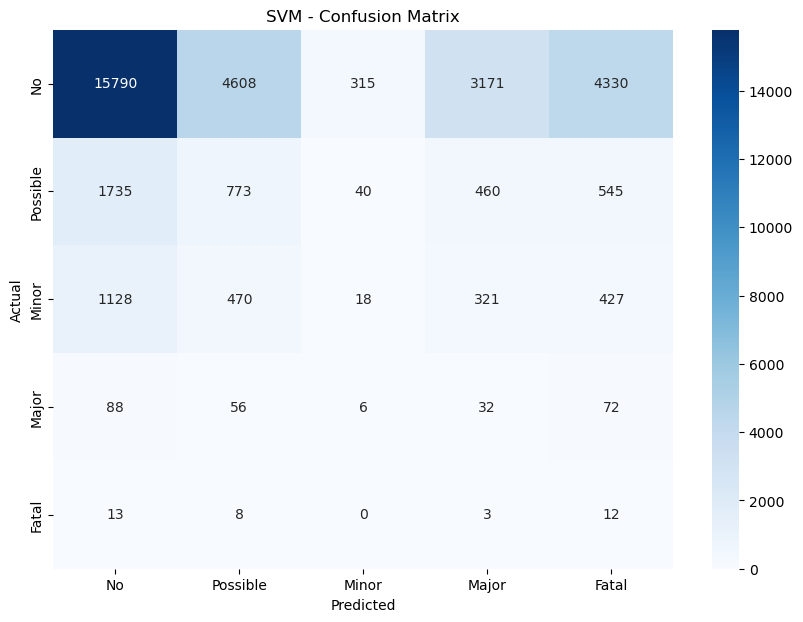

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Possible', 'Minor', 'Major', 'Fatal'], yticklabels=['No', 'Possible', 'Minor', 'Major', 'Fatal'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVM - Confusion Matrix')
plt.show()

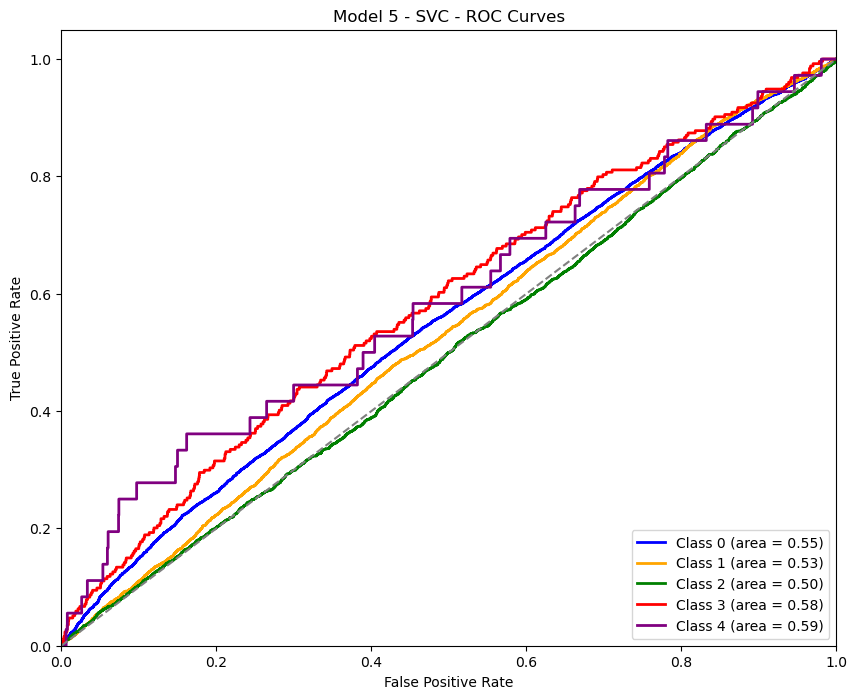

In [26]:
decision_scores = model.decision_function(X_test)
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the labels
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4])

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(y_test_bin[0])):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], decision_scores[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

    
# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
colors = ['blue', 'orange', 'green','red', 'purple'] 
for i in range(len(y_test_bin[0])):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2,
             label='Class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Model 5 - SVC - ROC Curves')
plt.legend(loc="lower right")
plt.show()